In [ ]:
import requests
from PIL import Image
from io import BytesIO
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
import matplotlib.pyplot as plt

In [ ]:
# 1. Load model and feature extractor
model_name = "antonioglass/vit-age-classifier"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# 2. Load face image (from URL or local file)
url = "https://github.com/dchen236/FairFace/raw/master/detected_faces/race_Asian_face0.jpg?raw=true"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")
# image = Image.open("/content/HSAQ_PP_2024_SEP.jpg").convert("RGB")

In [ ]:
# 3. Preprocess
inputs = feature_extractor(images=image, return_tensors="pt")

In [ ]:
# 4. Perform inference
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
probs = torch.nn.functional.softmax(logits, dim=1)[0]
pred_idx = int(probs.argmax())
pred_label = model.config.id2label[pred_idx]
confidence = float(probs[pred_idx])

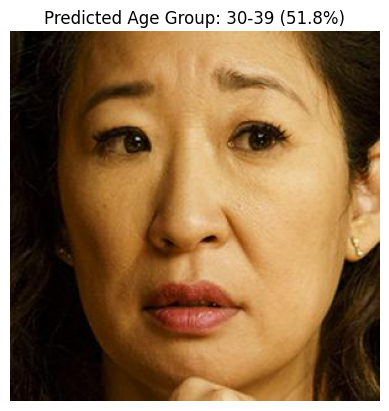

In [ ]:
# 5. Display image and result
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Age Group: {pred_label} ({confidence*100:.1f}%)")
plt.show()

# ML & DL Model Training and Saving



This notebook demonstrates:
- Training a basic ML model using `sklearn`
- Training a basic DL model using `Keras`
- Saving both models to disk
- Explaining what gets saved


In [ ]:
!pip install scikit-learn tensorflow

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Step 2: Prepare Dataset

We use the Iris dataset for both ML and DL training.

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# For ML
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.2, random_state=42)

# For DL
y_dl = to_categorical(y)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_dl, test_size=0.2, random_state=42)

## Step 3: Train and Save Sklearn (ML) Model

In [ ]:
ml_model = LogisticRegression(max_iter=200)
ml_model.fit(X_train_ml, y_train_ml)

# Save model
joblib.dump(ml_model, 'logistic_model.pkl')

['logistic_model.pkl']

## Step 4: Train and Save Keras (DL) Model

In [ ]:
dl_model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3431 - loss: 1.3672
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.2490 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3483 - loss: 1.0751 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 0.9930 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3958 - loss: 0.8981 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4804 - loss: 0.8864 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.8687 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.7850 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.7499 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8748 - loss: 0.7129 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.7029 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [ ]:
# Save model
dl_model.save('keras_model.keras')

## Step 5: What Gets Saved?

### Sklearn Model (`logistic_model.pkl`)
- Coefficients and intercepts
- Internal model state (if any)
- No architecture, just weights and logic

### Keras Model (`keras_model.keras`)
- Full model architecture (Sequential or Functional)
- Weights and biases
- Optimizer state
- Loss and metrics configuration

# Model Loading and Inference



Now we show how to:
- Load saved Sklearn and Keras models
- Perform inference on sample test data

In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

## Step 1: Provide Input Feature Values

The models were trained on the Iris dataset which has 4 features:
1. Sepal length (cm)
2. Sepal width (cm)
3. Petal length (cm)
4. Petal width (cm)

Provide values in the exact same order.

In [ ]:
# Example input: [5.1, 3.5, 1.4, 0.2]
user_input = [float(x) for x in input("Enter 4 values separated by commas (sepal_len, sepal_wid, petal_len, petal_wid): ").split(",")]
X_user = np.array(user_input).reshape(1, -1)

# Class names mapping
class_names = ['Setosa', 'Versicolor', 'Virginica']

Enter 4 values separated by commas (sepal_len, sepal_wid, petal_len, petal_wid): 5.1, 3.5, 1.4, 0.2


## Step 2: Inference Using Sklearn Model

In [ ]:
ml_model = joblib.load('logistic_model.pkl')
ml_pred_index = ml_model.predict(X_user)[0]
ml_pred_name = class_names[ml_pred_index]

print(f"Sklearn Prediction → Class Index: {ml_pred_index}, Class Name: {ml_pred_name}")

Sklearn Prediction → Class Index: 0, Class Name: Setosa


## Step 3: Inference Using Keras Model

In [ ]:
dl_model = load_model('keras_model.keras')
dl_pred = dl_model.predict(X_user)
dl_pred_index = np.argmax(dl_pred, axis=1)[0]
dl_pred_name = class_names[dl_pred_index]

print(f"Keras Prediction → Class Index: {dl_pred_index}, Class Name: {dl_pred_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Keras Prediction → Class Index: 0, Class Name: Setosa
